In [46]:
# This code is written in a google colab notebook. Minor modifications might be required you run it elsewhere.

!wget https://email.strava.com/ls/click?upn=u001.OTZUsjTDwFHJlyyma-2F9zHAjXyTSRLtZcvYxscJMF0DYGTpmC20CvtcPrH22lzYpQKkTs112QFWQAv5I0OcTLUpMb3UfG3TQkvIyJhNrZH4zVR-2FA2JMRd0MzhGqSpjmrt2gpozDgmx4olNoZwek4fy2X9WoZ1J04GMYVYXUK8Ha-2BZDwJGycWhd5fc-2BhzLRtapj-2FB3-2BMGJVtPurhOywfpoCFZk-2B0Cy3vsJMcDgBzT82E6CSl2fNQjtp7AbvUKmmUnA9Mb0AIkGiMplkLNd0LE5pp0dSpk8kehTdceebOZuGir5S3HeQtQ7tnMv-2ByeZOlZoWikCKLTPoqGx-2BRct7LdTBJwY85wAgdtDmfXw0LYCoWjYcHbG-2By-2BwgEdVk8JRpwC2czNiqj1tbnustcUl2xOilkDdL2dAU3tLQkV1t1Cx3NRL06ihMjWfksnQ7-2BvHIJ8Jc-2FodIwJ1-2F-2B3XOT7JJ0dRgmLKTdF4zF7or2yHOaLSjHU5lxnOXZHAbQ1aWkrgwW52UkQtCB5Z2VKGIlSbE1m-2F3a8EkPN7-2Bx3mqUIpD1PjQA0-3DQGSd_kSEEs2JPzX6tjXwy6QEKnNjMdXujVe6XmNqm5rD8ZBGKMpeQsrr6TWlsbRvs2BWOyoldksJ31HDMUWzL4AyLppQH4a3a6PzpQbx33wRaUwDKtEF6PhutZzS-2Bdxg3BPMZGzfdbGyE3L7bM9Kc-2B1ic6l2OlDS6BEixALqds-2BEGB1uEj76IrUBrjuvEETk1N5rN40JkxP4vn-2FLRJGJ-2FVdc3nnYa5VW2endnOH16sc5qzEQ5i66vSNohy-2Bz6wEzIT-2FMRwcBkoDz9DTT7C0wswa2K-2Ff8Q0z81oI-2FzqREh1LAKXJ3yG6DSRE-2B1fIOecUEZbjxjlfIPMDZ4U1V9YWYurwYjEAhuADcKFrPBgHdajG0qYhs-3D -O export.zip

# The archive link expires after a period. Refer Strava policy for more information

!unzip export.zip -d export > /dev/null
!mkdir /content/activities_data
!mkdir /content/activities_data/excel

--2025-06-01 16:38:12--  https://email.strava.com/ls/click?upn=u001.OTZUsjTDwFHJlyyma-2F9zHAjXyTSRLtZcvYxscJMF0DYGTpmC20CvtcPrH22lzYpQKkTs112QFWQAv5I0OcTLUpMb3UfG3TQkvIyJhNrZH4zVR-2FA2JMRd0MzhGqSpjmrt2gpozDgmx4olNoZwek4fy2X9WoZ1J04GMYVYXUK8Ha-2BZDwJGycWhd5fc-2BhzLRtapj-2FB3-2BMGJVtPurhOywfpoCFZk-2B0Cy3vsJMcDgBzT82E6CSl2fNQjtp7AbvUKmmUnA9Mb0AIkGiMplkLNd0LE5pp0dSpk8kehTdceebOZuGir5S3HeQtQ7tnMv-2ByeZOlZoWikCKLTPoqGx-2BRct7LdTBJwY85wAgdtDmfXw0LYCoWjYcHbG-2By-2BwgEdVk8JRpwC2czNiqj1tbnustcUl2xOilkDdL2dAU3tLQkV1t1Cx3NRL06ihMjWfksnQ7-2BvHIJ8Jc-2FodIwJ1-2F-2B3XOT7JJ0dRgmLKTdF4zF7or2yHOaLSjHU5lxnOXZHAbQ1aWkrgwW52UkQtCB5Z2VKGIlSbE1m-2F3a8EkPN7-2Bx3mqUIpD1PjQA0-3DQGSd_kSEEs2JPzX6tjXwy6QEKnNjMdXujVe6XmNqm5rD8ZBGKMpeQsrr6TWlsbRvs2BWOyoldksJ31HDMUWzL4AyLppQH4a3a6PzpQbx33wRaUwDKtEF6PhutZzS-2Bdxg3BPMZGzfdbGyE3L7bM9Kc-2B1ic6l2OlDS6BEixALqds-2BEGB1uEj76IrUBrjuvEETk1N5rN40JkxP4vn-2FLRJGJ-2FVdc3nnYa5VW2endnOH16sc5qzEQ5i66vSNohy-2Bz6wEzIT-2FMRwcBkoDz9DTT7C0wswa2K-2Ff8Q0z81oI-2FzqREh1LAKXJ3yG6DSRE-2B1fIOecUE

In [ ]:
%pip install gpx-converter
%pip install fiona

In [154]:
from gpx_converter import Converter
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point, Polygon
from google.colab import files
import fiona

In [ ]:
activities_gpx_source_path = '/content/export/activities'
activities_xlsx_destination_path = '/content/activities_data/excel'

for afile in os.listdir(activities_gpx_source_path):
  oldfile = activities_gpx_source_path + '/' + afile
  newfile = activities_xlsx_destination_path + '/'+ afile.split('.', 1)[0] + '.xlsx'
  # Safety net to spot and skip any corrupt/invalid files.
  try:
    Converter(input_file=oldfile).gpx_to_excel(output_file=newfile)
  except Exception as e:
    print(e, oldfile)

'time' /content/export/activities/10335662653.gpx
'time' /content/export/activities/10440457487.gpx
'time' /content/export/activities/10371902271.gpx
'time' /content/export/activities/10489836909.gpx
'time' /content/export/activities/10477066237.gpx
'time' /content/export/activities/10397842723.gpx
'time' /content/export/activities/10454590667.gpx
'time' /content/export/activities/12045855432.gpx
'time' /content/export/activities/10534980193.gpx
'time' /content/export/activities/10323611580.gpx
'time' /content/export/activities/10331001182.gpx
'time' /content/export/activities/10450948509.gpx
'time' /content/export/activities/10631507266.gpx
'time' /content/export/activities/10592021522.gpx
'time' /content/export/activities/10528437662.gpx
'time' /content/export/activities/10319614370.gpx


In [ ]:
Activities_List_DF = pd.read_csv('/content/export/activities.csv')
Ride_Activities_List_DF = Activities_List_DF.query('`Activity Type` == "Ride" & `From Upload` == 1')

Activity_details_df = pd.DataFrame()

for activity in Ride_Activities_List_DF["Activity ID"]:
  filepath = activities_xlsx_destination_path + '/' + str(activity) + '.xlsx'
  append_data = pd.read_excel(filepath, 'Sheet1')
  Activity_details_df = pd.concat([Activity_details_df, append_data])

# saving the dataframes
Activity_details_df.to_csv('All_activity_details_df.csv')
Activities_List_DF.to_csv('All_Activities_List_DF.csv')
Ride_Activities_List_DF.to_csv('Ride_Activities_List_DF.csv')

In [3]:
All_Activities_List_csv_file_path = '/content/All_activity_details_df.csv'

def CreateGeoPandasDF(path, crs ,trim=False):
  DataFrame = pd.read_csv(path)
  DataFrame.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)
  geometry=[Point(xy) for xy in zip(DataFrame['longitude'], DataFrame['latitude'])]
  geodata=gpd.GeoDataFrame(DataFrame,crs=crs, geometry=geometry)
  return geodata

crs={'init':'epsg:4326'}

All_activity_details_gdf = CreateGeoPandasDF(All_Activities_List_csv_file_path,crs)

/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [4]:
Map_File_Path = '/content/tamil-nadu.kml'

# Enable the KML driver
fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Read the KML file
kml_file_path = Map_File_Path
Map_File = gpd.read_file(kml_file_path, driver='KML')

In [5]:
min_lat = All_activity_details_gdf['latitude'].min()
max_lat = All_activity_details_gdf['latitude'].max()

min_long = All_activity_details_gdf['longitude'].min()
max_long = All_activity_details_gdf['longitude'].max()

print(min_lat, max_lat, min_long, max_long)

12.368911 13.437074 79.783437 80.319394


In [161]:
Cal_DF = Activities_List_DF.query('`Activity Type` == "Ride"')
Total_rides = len(Cal_DF)
Total_distance = round(Cal_DF['Distance'].sum())
Total_moving_time = round(Cal_DF['Moving Time'].sum()/(3600))
Average_Speed = round(Total_distance/Total_moving_time, 2)

Riders_Name = " Mikail's"

Font_text_color = '#FFFFFF'
Font_background_color = '#6F1D1B'
Font_size = 12
Title_Font_size = 12

Map_background_color = '#C7D9B7'
Map_color = '#F3E1DD'
Map_line_thickness = 0.15

Points_color = '#6F1D1B'
Points_line_thickness = 0.5

#Other colours #89023E
mpl.rcParams['figure.dpi'] = 600

Add_Text_Position_Left = 0.35
Add_Text_Position_Right = 0.55

Add_Text_Position_Bottom = 0.07
Add_Text_Position_Row_Gap = 0.09

Text(0.55, -0.01999999999999999, 'Avg Speed: 13.63 km/hr')

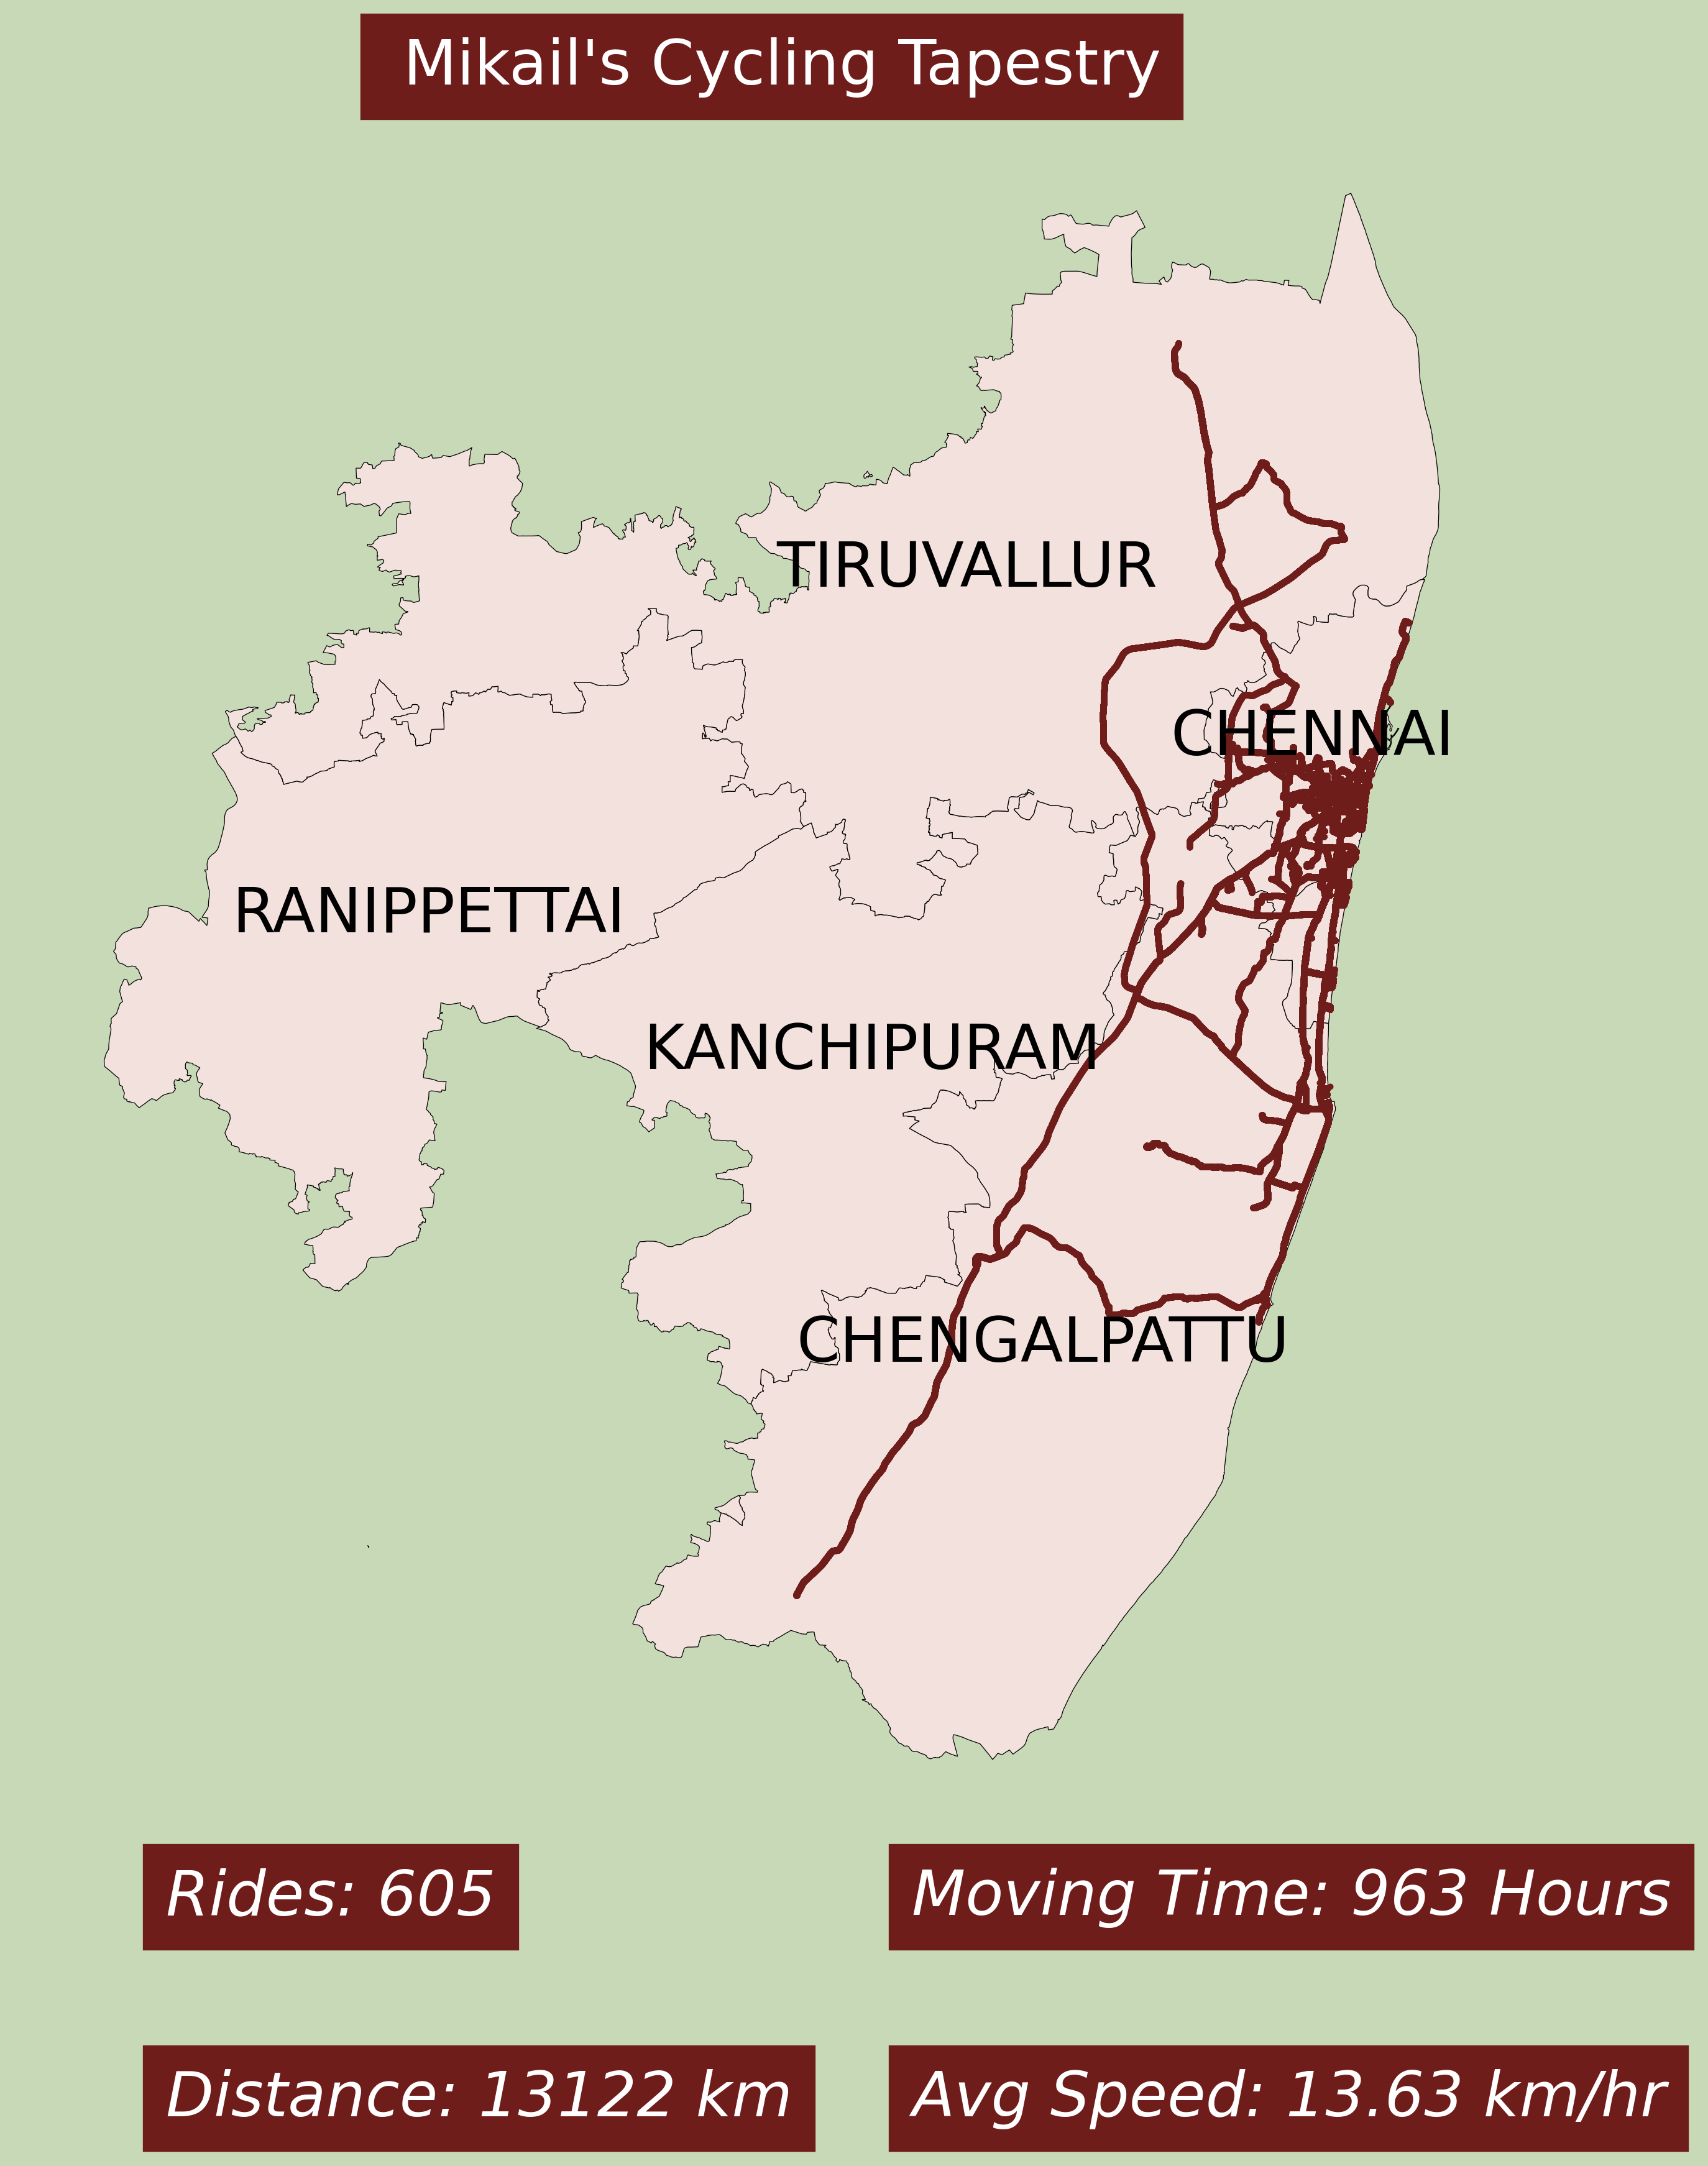

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axis('off')
fig.set_facecolor(Map_background_color)
plt.title(label=f"{Riders_Name} Cycling Tapestry", fontsize=Title_Font_size, color=Font_text_color, backgroundcolor=Font_background_color)
bbox = Polygon([(min_long, min_lat), (max_long, min_lat), (max_long, max_lat), (min_long, max_lat)])
bbox_gdf = gpd.GeoDataFrame([1], geometry=[bbox], crs=Map_File.crs)

filtered_gdf = Map_File[Map_File.intersects(bbox)]

filtered_gdf.plot(ax=ax, edgecolor='black', linewidths=Map_line_thickness, facecolor=Map_color)

All_activity_details_gdf.plot(ax=ax,color=Points_color, edgecolor=Points_color, markersize=Points_line_thickness, linewidths=Points_line_thickness)

#Error Possibility: If any row has Nan Values

# Add labels from the map file. This step can be skipped if there are no labels in your map file
for idx, row in filtered_gdf.iterrows():
    centroid = row.geometry.centroid
    name = row['Name']
    # Name is specific to the map file. It can vary depending on the map file
    ax.text(centroid.x, centroid.y, name, fontsize=Font_size, ha='center', va='center')

ax.set_xticks([])
ax.set_yticks([])

fig.text(Add_Text_Position_Left, Add_Text_Position_Bottom, f"Rides: {Total_rides}", fontsize=Font_size, color=Font_text_color, ha='left', va='bottom', backgroundcolor=Font_background_color, fontstyle="italic")
fig.text(Add_Text_Position_Left, Add_Text_Position_Bottom-Add_Text_Position_Row_Gap, f"Distance: {Total_distance} km", fontsize=Font_size, color=Font_text_color, ha='left', va='bottom', backgroundcolor=Font_background_color, fontstyle="italic")

fig.text(Add_Text_Position_Right, Add_Text_Position_Bottom, f"Moving Time: {Total_moving_time} Hours", fontsize=Font_size, color=Font_text_color, ha='left', va='bottom', backgroundcolor=Font_background_color, fontstyle="italic")
fig.text(Add_Text_Position_Right, Add_Text_Position_Bottom-Add_Text_Position_Row_Gap, f"Avg Speed: {Average_Speed} km/hr", fontsize=Font_size, color=Font_text_color, ha='left', va='bottom', backgroundcolor=Font_background_color, fontstyle="italic")